In [7]:
from pathlib import Path
from nbdev.showdoc import *
from fastcore.all import *
import numpy as np,numbers
doc(coll_repr)
coll_repr([run])

'(#1) [<function run at 0x000002DBED53D300>]'

In [8]:
ffmpeg_convert_cmd = "ffmpeg -i {input_path}/{input_name} {output_path}/{filename}.{ext}"
subject_file = "subject_song.wav"
reference_file = "reference_song.mp3" 
reference_file2 = "reference_song.wav" 

In [9]:

def get_convert_wav_cmd(infile, input_path = ".", output_path=".", ext='wav'):
    input_name = Path(input_path) / infile 
    filename = input_name.stem 
    
    return ffmpeg_convert_cmd.format(
        
        input_path=input_path, 
        input_name=input_name,
        output_path=output_path,
        filename=filename,
        ext=ext
        )

In [11]:
print(convert_cmd)

ffmpeg -i ./reference_song.mp3 ./reference_song.wav


In [16]:
def convert_to_wav(file):
    convert_cmd = get_convert_wav_cmd(reference_file)
    run(convert_cmd)

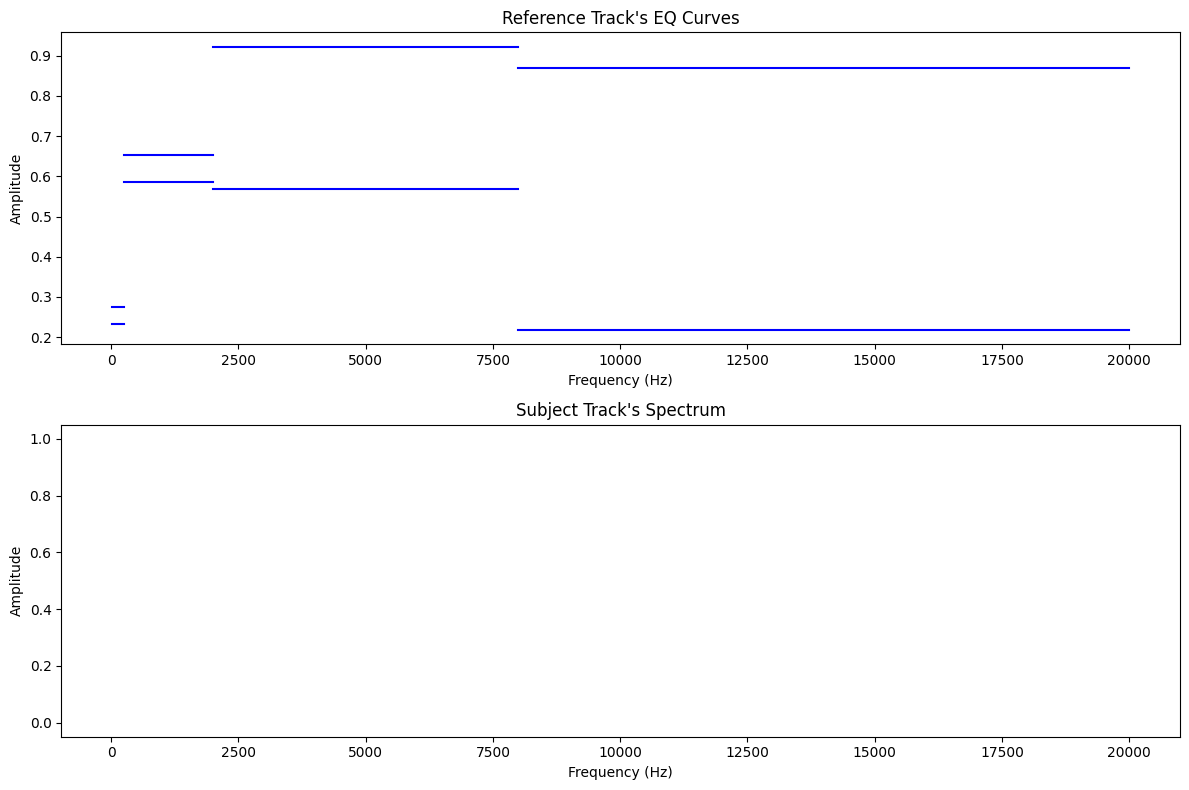

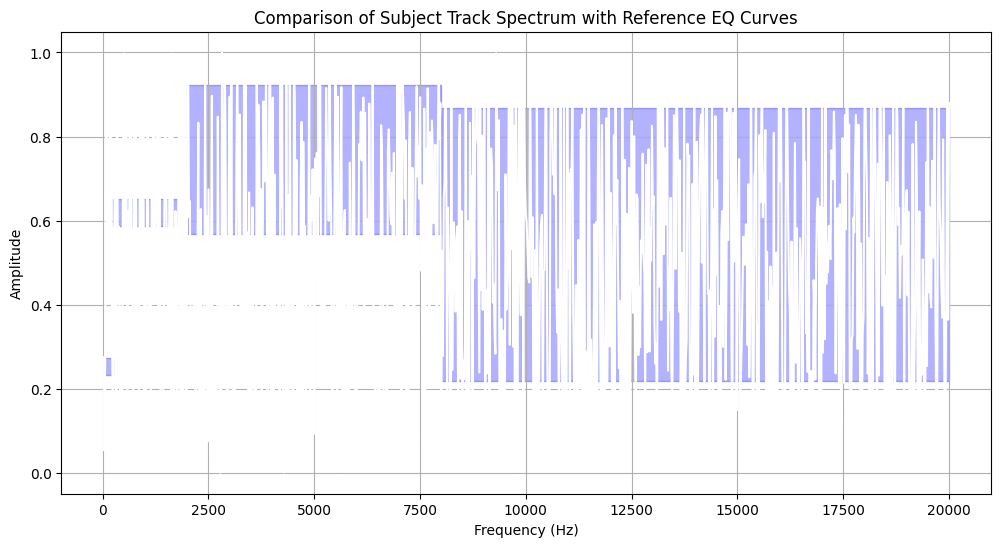

In [28]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt

def read_audio(file_path):
    """Read audio file and return sample rate and data."""
    sample_rate, data = wavfile.read(file_path)
    return sample_rate, data

def calculate_spectrum(data, sample_rate):
    """Calculate spectrum using Fast Fourier Transform (FFT)."""
    n = len(data)
    fft_result = np.fft.fft(data) / n
    frequency = np.fft.fftfreq(n, 1 / sample_rate)
    return np.abs(frequency[:n // 2]), np.abs(fft_result[:n // 2])

reference_file2 = "reference_song.wav" 

def test_sample_rate(song_file=reference_file2):
    # Example usage:
    sample_rate, data = read_audio(song_file)
    print(f"Sample rate: {sample_rate}\n{data}")


def test_spectrum(song_file=reference_file2):
    sample_rate, data = read_audio(song_file)
    frequency, spectrum = calculate_spectrum(data, sample_rate)
    print(f"freq: {frequency} \n spec: {spectrum}") 

# test_sample_rate(subject_file)
# test_spectrum(subject_file)
# test_sample_rate(reference_file2)
# test_spectrum(reference_file2)





def plot_spectrum(frequency, spectrum, title):
    """Plot spectrum."""
    plt.figure(figsize=(10, 6))
    plt.plot(frequency, spectrum)
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

def test_plot_spectrum(song_file=reference_file2):
    # Example usage:
    sample_rate, data = read_audio(song_file)
    frequency, spectrum = calculate_spectrum(data, sample_rate)
    print(f"freq: {frequency} \n spec: {spectrum}")
    plot_spectrum(frequency, spectrum, "Subject Track Spectrum")

# test_plot_spectrum()


TARGET_CURVE_RANGES = {
    'Low': (20, 250),
    'Low-mid': (250, 2000),
    'Mid': (2000, 8000),
    'High-mid': (8000, 20000)
}

def extract_target_curve(frequency, spectrum):
    """Extract target curve based on predefined ranges."""
    target_curve = {}
    for band, (low, high) in TARGET_CURVE_RANGES.items():
        indices = np.where((frequency >= low) & (frequency <= high))
        target_curve[band] = np.mean(spectrum[indices])
    return target_curve

def test_extract_target_curve(song_file=reference_file2):
    # Example usage:
    print("Extracting target curve")
    sample_rate, data = read_audio(song_file)
    frequency, spectrum = calculate_spectrum(data, sample_rate)
    target_curve = extract_target_curve(frequency, spectrum)
    print(target_curve)

# test_extract_target_curve()



def tonal_balance_control(
    subject_file_path=subject_file, 
    reference_file_path=reference_file2):
    """Tonal Balance Control program."""
    print("Read subject audio file")
    subject_sample_rate, subject_data = read_audio(subject_file_path)
    
    print("# Read reference audio file")
    reference_sample_rate, reference_data = read_audio(reference_file_path)
    
    print("# Calculate spectrum for subject track")
    subject_frequency, subject_spectrum = calculate_spectrum(subject_data, subject_sample_rate)
    
    print("# Calculate spectrum for reference track")
    reference_frequency, reference_spectrum = calculate_spectrum(reference_data, reference_sample_rate)
    
    print("# Extract target curve for reference track")
    reference_target_curve = extract_target_curve(reference_frequency, reference_spectrum)
    
    print("# Plot target curve for reference track")
    plt.figure(figsize=(10, 6))
    for band, (low, high) in TARGET_CURVE_RANGES.items():
        plt.bar(band, reference_target_curve[band], color='blue', alpha=0.5)
    
    print("# Plot spectrum for subject track")
    plt.plot(subject_frequency, subject_spectrum, color='white')
    
    plt.title("Comparison of Subject Track Spectrum with Reference Target Curve")
    plt.xlabel('Frequency Bands')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

# tonal_balance_control()

# Step 4: User Interface
def tonal_balance_control2(subject_spectrum, reference_spectrum, reference_target_curve):
    """Tonal Balance Control program."""
    # Plotting separate spectra for subject and reference tracks
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

    # Plot reference track's EQ curves
    for band, (low, high) in TARGET_CURVE_RANGES.items():
        ax1.plot([low, high], [reference_target_curve[band], reference_target_curve[band]], color='blue')
    ax1.set_title("Reference Track's EQ Curves")
    ax1.set_xlabel('Frequency (Hz)')
    ax1.set_ylabel('Amplitude')

    # Plot subject track's spectrum
    ax2.plot(subject_spectrum[0], subject_spectrum[1], color='white')
    ax2.set_title("Subject Track's Spectrum")
    ax2.set_xlabel('Frequency (Hz)')
    ax2.set_ylabel('Amplitude')

    plt.tight_layout()
    plt.show()

    # Plotting comparison between subject and reference tracks
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot reference track's EQ curves as blue bars representing spectral variation
    for band, (low, high) in TARGET_CURVE_RANGES.items():
        ax.fill_between([low, high], reference_target_curve[band][0], reference_target_curve[band][1],
                        color='blue', alpha=0.3)

    # Plot subject track's spectrum as a white line
    ax.plot(subject_spectrum[0], subject_spectrum[1], color='white')

    ax.set_title("Comparison of Subject Track Spectrum with Reference EQ Curves")
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Amplitude')
    plt.grid(True)
    plt.show()

# Example usage:
# Assume subject_spectrum and reference_spectrum are tuples of (frequency, spectrum) for subject and reference tracks respectively
subject_spectrum = (np.linspace(20, 20000, 1000), np.random.rand(1000))  # Example subject spectrum
reference_spectrum = (np.linspace(20, 20000, 1000), np.random.rand(1000))  # Example reference spectrum
reference_target_curve = {'Low': (np.random.rand(), np.random.rand()),
                          'Low-mid': (np.random.rand(), np.random.rand()),
                          'Mid': (np.random.rand(), np.random.rand()),
                          'High-mid': (np.random.rand(), np.random.rand())}  # Example reference target curve
tonal_balance_control2(subject_spectrum, reference_spectrum, reference_target_curve)

Initialize plot
Set plot attributes
Initialize and start real-time audio processing


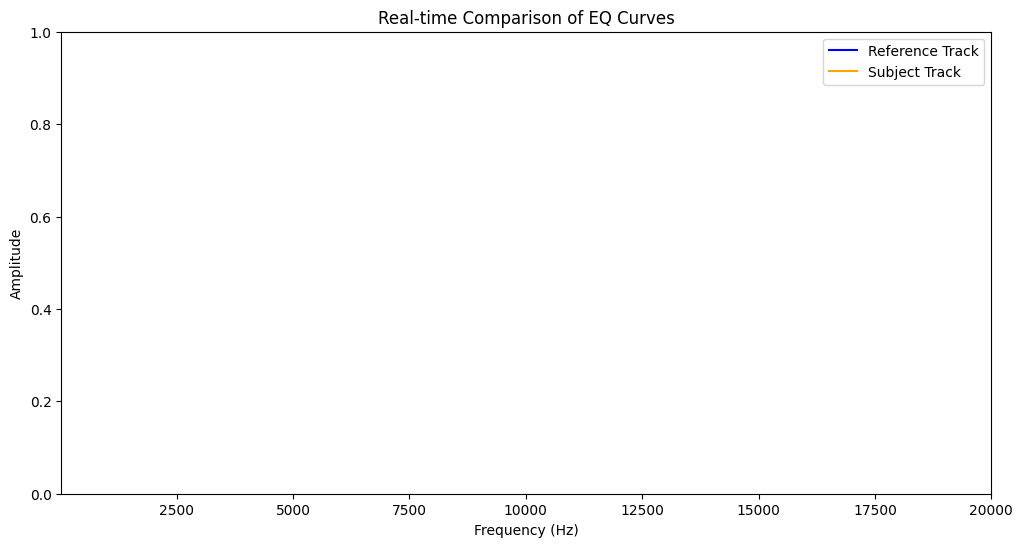

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import soundfile as sf

# Constants
TARGET_CURVE_RANGES = {
    'Low': (20, 250),
    'Low-mid': (250, 2000),
    'Mid': (2000, 8000),
    'High-mid': (8000, 20000)
}
N = 0.2  # Ideal range width



# Real-time update function
def update_plot(frames, time, status):
    if status:
        print(status)
    
    print("Read audio data from files")
    reference_data, _ = sf.read('reference_song.wav', start=frames.start, stop=frames.stop, dtype='float32')
    subject_data, _ = sf.read('subject_song.wav', start=frames.start, stop=frames.stop, dtype='float32')

    reference_freq, reference_eq_curve = calculate_eq_curve(reference_data, sample_rate)
    subject_freq, subject_eq_curve = calculate_eq_curve(subject_data, sample_rate)
    
    reference_line.set_data(reference_freq, list(reference_eq_curve.values()))
    reference_fill.remove()
    reference_fill = ax.fill_between(reference_freq, 
                                     [val - N for val in reference_eq_curve.values()],
                                     [val + N for val in reference_eq_curve.values()],
                                     color=reference_color, alpha=0.5)
    
    subject_line.set_data(subject_freq, list(subject_eq_curve.values()))
    
    return reference_line, reference_fill, subject_line





def calculate_eq_curve(data, sample_rate):
    """Calculate EQ curve from audio data."""
    spectrum = np.abs(np.fft.fft(data))
    frequency = np.fft.fftfreq(len(data), 1 / sample_rate)[:len(data) // 2]
    
    eq_curve = {}
    for band, (low, high) in TARGET_CURVE_RANGES.items():
        indices = np.where((frequency >= low) & (frequency <= high))
        eq_curve[band] = np.mean(spectrum[indices])
    
    return frequency, eq_curve

def plot_realtime_eq_curve(reference_color, subject_color):
    """Plot real-time EQ curves for reference and subject tracks."""
    print("Initialize plot")
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot reference track's EQ curve
    reference_line, = ax.plot([], [], color=reference_color, label='Reference Track')
    reference_fill = ax.fill_between([], [], [], color=reference_color, alpha=0.5)
    
    # Plot subject track's EQ curve
    subject_line, = ax.plot([], [], color=subject_color, label='Subject Track')

    print("Set plot attributes")
    ax.set_title("Real-time Comparison of EQ Curves")
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Amplitude')
    ax.set_xlim(20, 20000)
    ax.set_ylim(0, 1)
    ax.legend()

    

def tonal_control(rfile='reference_song.wav', sfile='subject_song.wav'):
    plot_realtime_eq_curve("blue", "orange")
    print("Initialize and start real-time audio processing")
    file_duration = 120  # seconds
    sample_rate = 44100
    channels = 2
    desired_block_duration = 1
    blocksize = int(sample_rate * desired_block_duration)
    # Process one block of audio at a time
    with sf.SoundFile(rfile) as reference, \
         sf.SoundFile(sfile) as subject:
        with sd.OutputStream(channels=channels, samplerate=sample_rate, callback=update_plot, blocksize=blocksize):
            for _ in range(len(reference) // blocksize):
                reference.read(blocksize)
                subject.read(blocksize)


tonal_control()